# Notebook for CRN2

This notebook can be used to generate data on the birth-death chemical reaction : $ø \xrightleftharpoons[\gamma]{k_r} S$.

In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import neuralnetwork
import convert_csv
import generate_data
import simulation
import sensitivities
import seaborn
import pandas as pd
from scipy.stats import poisson

## Import data

In [8]:
FILE_NAME = 'CRN2_birth_death'
CRN_NAME = 'birth_death'
NUM_PARAMS = 2

In [9]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')
y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')
X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')
y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')
X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

## Choosing number of components - Elbow method

We use the elbow method to choose the appropriate number of components.

Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:53<00:00,  4.39it/s]


Learning rate: 0.00125,
Train loss: 0.0009605155210010707,
 Valid loss: 0.0009336364455521107
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:16<00:00,  3.65it/s]


Learning rate: 0.00125,
Train loss: 0.0009308833396062255,
 Valid loss: 0.0009356966475024819
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:16<00:00,  3.65it/s]


Learning rate: 0.0025,
Train loss: 0.0010186240542680025,
 Valid loss: 0.0010062229121103883
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:32<00:00,  3.26it/s]


Learning rate: 0.00125,
Train loss: 0.0009648181148804724,
 Valid loss: 0.0009417741093784571
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:49<00:00,  2.94it/s]


Learning rate: 0.00125,
Train loss: 0.0009788298048079014,
 Valid loss: 0.000975743168964982
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:04<00:00,  2.70it/s]


Learning rate: 0.0025,
Train loss: 0.0010537237394601107,
 Valid loss: 0.0010444986401125789


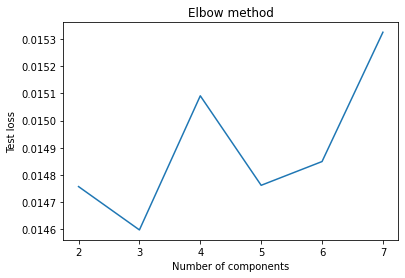

In [4]:
n_comps = np.arange(2, 8)
losses = []
for n in n_comps:
    model = neuralnetwork.NeuralNetwork(n_comps=n, n_params=NUM_PARAMS)
    neuralnetwork.train_NN(model, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
    losses.append(neuralnetwork.mean_loss(X_test, y_test, model, loss=neuralnetwork.loss_hellinger).detach().item())
plt.plot(n_comps, losses)
plt.xlabel('Number of components')
plt.ylabel('Test loss')
plt.title('Elbow method')
plt.show()

In [10]:
N_COMPS = 3

## Training models

We train 3 different models to compare their accuracy.

In [11]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)

Neural Network created.
Neural Network created.
Neural Network created.


In [12]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)

Training ...:  62%|██████▏   | 311/500 [03:37<02:12,  1.43it/s]


Learning rate: 0.0003125,
Train loss: 19.20571517944336,
 Valid loss: 19.253864288330078


Training ...: 100%|█████████▉| 499/500 [04:16<00:00,  1.95it/s]


Learning rate: 0.00125,
Train loss: 0.0009301902027800679,
 Valid loss: 0.0009750132448971272


Training ...: 100%|█████████▉| 499/500 [02:08<00:00,  3.87it/s]

Learning rate: 0.00125,
Train loss: 0.0010072177974507213,
 Valid loss: 0.0009494067635387182


In [8]:
# Compute losses

print("Training dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_train3, y_train3, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_train3, y_train3, model3, loss=neuralnetwork.loss_hellinger)}')

print("\nValidation dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_valid3, y_valid3, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_valid3, y_valid3, model3, loss=neuralnetwork.loss_hellinger)}')

print("\nTest dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_hellinger)}')


Training dataset
KLD : 0.0010637390660122037
Hellinger : 0.01541635487228632

Validation dataset
KLD : 0.0010553578613325953
Hellinger : 0.015347624197602272

Test dataset
KLD : 0.0010651791235432029
Hellinger : 0.015416445210576057


## Distributions plot

To compare predicted distributions to the theoretical ones. Given an initial condition of 0 $S$, the population of $S$ at any later time is a random integer sampled from a Poisson distribution :

$$f(x, t, k_r, \gamma) = \frac{\lambda(t, k_r, \gamma)^x e^{-\lambda(t, k_r, \gamma)}}{x!} \text{ where } \lambda(t, k_r, \gamma) = \frac{k_r}{\gamma}(1-e^{-\gamma t})$$

In [9]:
def birth_death_distribution(x, t, kr, gamma):
    lambd = kr*(1-np.exp(-gamma*t))/gamma
    return lambd**x*np.exp(-lambd)/np.math.factorial(x)


In [18]:
def plot_model(to_pred, 
            models, 
            n_comps=N_COMPS, 
            up_bound=500, 
            index = ['Probabilities', 'Abundance of specy S'], 
            test_result=(False, None), 
            exact_result=True, 
            confidence_interval=False,
            plot = ('distribution', None),
            distribution=birth_death_distribution,):
    # prediction
    x = torch.arange(up_bound).repeat(1, n_comps,1).permute([2,0,1])
    preds = []
    for i, model in enumerate(models):
        if plot[0] == 'distribution':
            y_pred = neuralnetwork.mix_nbpdf(model, to_pred, x)
        elif plot[0] == 'sensitivities':
            y_pred = sensitivities.sensitivities(to_pred, model, length_output=up_bound)[:, plot[1]+1]
        y_pred = y_pred.detach().numpy()
        pred = pd.DataFrame([np.squeeze(y_pred), np.arange(up_bound)], index = ['prob', 'k']).transpose()
        pred['model'] = f'model{i+1}'
        preds.append(pred)
    if test_result[0]:
        result = test_result[1]
        test_result = pd.DataFrame([np.squeeze(result.detach().numpy()), np.arange(up_bound)], index = ['prob', 'k']).transpose()
        test_result['model'] = 'SSA simulation'
        preds.append(test_result)
    if exact_result:
        exact_result = pd.DataFrame([[distribution(k, to_pred[0].numpy(), to_pred[1].numpy(), to_pred[2].numpy()) for k in range(up_bound)], 
                                    np.arange(up_bound)], index = ['prob', 'k']).transpose()
        exact_result['model'] = 'theoretical result'
        preds.append(exact_result)
    data = pd.concat(preds, ignore_index=True)
    t = round(np.float64(to_pred[0]),2)
    kr = round(np.float64(to_pred[1]),2)
    gamma = round(np.float64(to_pred[2]),2)
    if confidence_interval:
        seaborn.relplot(data=data, x='k', y='prob', aspect=1.5, kind='line').set(title=fr'{plot[0]} plot for  $ø \rightleftharpoons S$ with $t=${t}, $k_r=${kr}, $\gamma=${gamma}')
    else:
        seaborn.relplot(data=data, x='k', y='prob', hue='model', style='model', aspect=1.5, kind='line').set(title=fr'{plot[0]} plot for  $ø \rightleftharpoons S$ with $t=${t}, $k_r=${kr}, $\gamma=${gamma}')

In [ ]:
import math

In [ ]:
def multiple_plots(to_pred, 
            models, 
            n_comps=N_COMPS, 
            up_bound=500, 
            index = ['Probabilities', 'Abundance of specy S'], 
            test_result=(False, None), 
            exact_result=True, 
            confidence_interval=False,
            plot = ('distribution', None),
            distribution=birth_death_distribution,):
    n = len(to_pred)
    n_col = math.floor(np.sqrt(n))
    fig, axes = plt.subplots(n_col, n//n_col)
    for k, pred in enumerate(to_pred):
        x = torch.arange(up_bound).repeat(1, n_comps,1).permute([2,0,1])
        preds = []
        for i, model in enumerate(models):
            if plot[0] == 'distribution':
                y_pred = neuralnetwork.mix_nbpdf(model, to_pred, x)
            elif plot[0] == 'sensitivities':
                y_pred = sensitivities.sensitivities(to_pred, model, length_output=up_bound)[:, plot[1]+1]
            y_pred = y_pred.detach().numpy()
            pred = pd.DataFrame([np.squeeze(y_pred), np.arange(up_bound)], index = ['prob', 'k']).transpose()
            pred['model'] = f'model{i+1}'
            preds.append(pred)
        if test_result[0]:
            result = test_result[1]
            test_result = pd.DataFrame([np.squeeze(result.detach().numpy()), np.arange(up_bound)], index = ['prob', 'k']).transpose()
            test_result['model'] = 'SSA simulation'
            preds.append(test_result)
        if exact_result:
            exact_result = pd.DataFrame([[distribution(k, to_pred[0].numpy(), to_pred[1].numpy(), to_pred[2].numpy()) for k in range(up_bound)], 
                                        np.arange(up_bound)], index = ['prob', 'k']).transpose()
            exact_result['model'] = 'theoretical result'
            preds.append(exact_result)
        data = pd.concat(preds, ignore_index=True)
        t = round(np.float64(to_pred[0]),2)
        kr = round(np.float64(to_pred[1]),2)
        gamma = round(np.float64(to_pred[2]),2)
        if confidence_interval:
            seaborn.relplot(data=data, x='k', y='prob', aspect=1.5, kind='line').set(title=fr'{plot[0]} plot for  $ø \rightleftharpoons S$ with $t=${t}, $k_r=${kr}, $\gamma=${gamma}')
        else:
            seaborn.relplot(data=data, x='k', y='prob', hue='model', style='model', aspect=1.5, kind='line').set(title=fr'{plot[0]} plot for  $ø \rightleftharpoons S$ with $t=${t}, $k_r=${kr}, $\gamma=${gamma}')

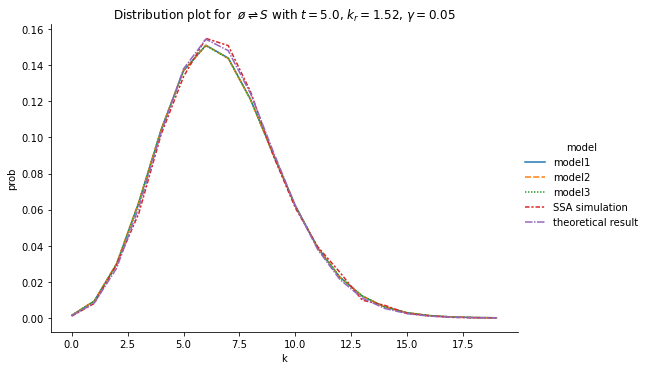

In [19]:
index = 100
plot_model(X_test[index,:], [model1, model2, model3], up_bound = 20, test_result=(True, y_test[index, :]))

We can check the accuracy for higher times than those of the training :

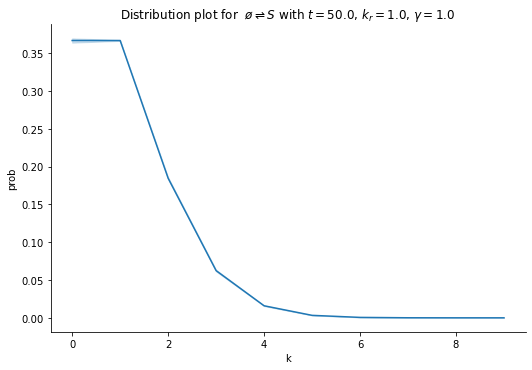

In [20]:
plot_model(torch.tensor([50., 1., 1.]), [model1, model2, model3], up_bound = 10, confidence_interval=True)

We can also check the accuracy for parameters outside the bounds of the training.

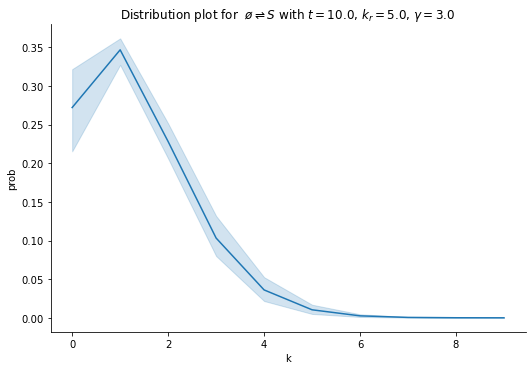

In [21]:
plot_model(torch.tensor([10., 5., 3.]), [model1, model2, model3], up_bound = 10, confidence_interval=True)

## Sentivities plot

To compute sensitivites and compare them to the theoretical ones. 

### With respect to $k_r$

$$\nabla_{k_r} f(x, t, k_r, \gamma) = \frac{1 - e^{-\gamma t}}{\gamma} \times \frac{\lambda(t, k_r, \gamma)^{x-1} e^{-\lambda(t, k_r, \gamma)}}{x!}

In [22]:
def birth_death_sensitivity_kr(x, t, kr, gamma):
    lambd = kr*(1-np.exp(-gamma*t))/gamma
    dlambd = (1-np.exp(-gamma*t))/gamma
    return dlambd*(x-lambd)*lambd**(x-1)*np.exp(-lambd)/np.math.factorial(x)

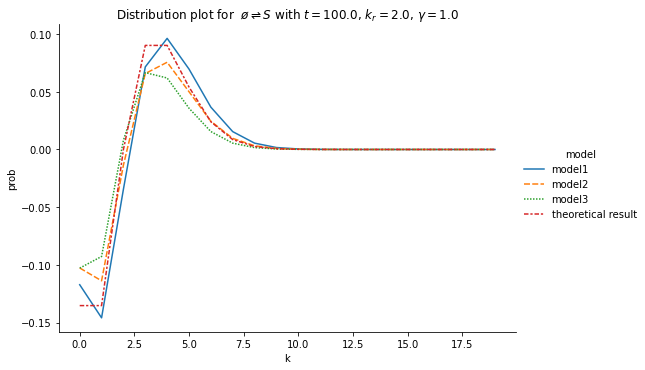

In [24]:
plot_model(torch.tensor([100., 2., 1.]), [model1, model2, model3], up_bound=20, plot=('sensitivities', 0), distribution=birth_death_sensitivity_kr)

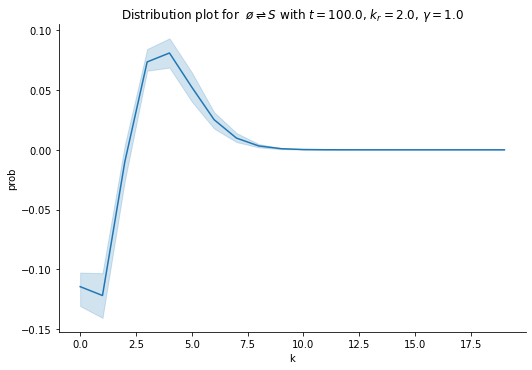

In [25]:
plot_model(torch.tensor([100., 2., 1.]), [model1, model2, model3], up_bound=20, plot=('sensitivities', 0), confidence_interval=True, distribution=birth_death_sensitivity_kr)

### With respect to $\gamma$

\begin{align}
\nabla_\gamma f(x, t, k_r, \gamma) &= \nabla_\gamma \lambda(t, k_r, \gamma) \frac{e^{-\lambda(t, k_r, \gamma)}(1 - \lambda(t, k_r, \gamma))}{x!} \\ \text{ where } \nabla_\gamma \lambda(t, k_r, \gamma) &= \frac{k_r}{\gamma} (1- e^{-\gamma t}) (t-\frac{1}{\gamma}) \\ &= \lambda(t, k_r, \gamma)(t-\frac{1}{\gamma})
\end{align}

In [1]:
def birth_death_sensitivity_gamma(x, t, kr, gamma):
    lambd = kr*(1-np.exp(-gamma*t))/gamma
    dlambd = lambd * (t-1/gamma)
    return dlambd * np.exp(-lambd) * (1-lambd) / np.math.factorial(x)

In [2]:
plot_model(torch.tensor([10., 2., 1.]), [model1, model2, model3], up_bound=20, plot=('sensitivities', 0), distribution=birth_death_sensitivity_gamma)

NameError: name 'plot_model' is not defined